# Twitter Sentiment Analysis

## Authors: 
- David Mburu 
- Lyster Moogi
- Julia Maina
- Denzel Tero
- Olin Wachira

# Business Overview
## Introduction
In modern digital technology, Twitter has become a popular platform where users openly express their opinions about tech brands and products. Apple and Google, being two of the world’s most dominant technology companies, are frequently mentioned in tweets that contain praise, complaints, comparisons or neutral commentary. This project aims to build a sentiment analysis model that can automatically analyze tweets related to Apple and Google products, and classify them as positive, negative or neutral. The insights generated from this classification will help businesses better understand public opinion and improve decision making in areas such as marketing and product development.


## Problem Statement
With thousands of daily mentions, Apple and Google receive significant feedback from customers on Twitter. However, analyzing this data manually is both time-consuming and inefficient due to its unstructured nature. Tweets often include informal language, abbreviations, emojis, making them difficult to interpret using traditional rule-based sentiment methods. To solve this, we propose an NLP-driven solution that can automatically and accurately classify sentiments in tweets as positive, negative or neutral. This will empower stakeholders to monitor public perception in real-time, respond proactively to trends and make decisions rooted in customer sentiment.


## Objectives

1. **Sentiment Analysis**: To classify tweets related to technology brands (Apple, Google, or none) into sentiment categories (Positive, Negative, Neutral) and understand public perception.

2. **Brand Engagement Analysis**: To identify which brands receive more attention and emotional engagement on Twitter, and to compare sentiment distributions across brands.

3. **Binary classification modeling** - To build, tune, and evaluate various machine learning models (Logistic Regression, Decision Trees, Random Forest to classify tweets as either positive or negative

4. **Multiclass classification modeling** - To group the remaining emotion categories as 'neutral' then train models to further classify tweets as neutral

## Data Understanding
This project uses a labeled dataset sourced from CrowdFlower via Data.world, containing 9093 tweets primarily focused on Apple and Google products. Each tweet has been manually annotated by human raters who classified each tweet’s sentiment and identified the brand or product targeted.
Key columns in the dataset include:

- tweet_text: the content of the Tweet
- emotion_in_tweet_is_directed_at: identifies the targeted product or brand
- is_there_an_emotion_directed_at_a_brand_or_product: indicating the sentiment toward the brand.



## Data Preparation
The dataset was cleaned and preprocessed to prepare it for sentiment analysis. Duplicate tweets were removed to avoid redundancy. Missing values in the emotion_in_tweet_is_directed_at column were filled with ‘No Brand’, and the one record missing tweet_text was dropped. Text Preprocessing included:

- Converting text to lowercase
- Tokenization
- Stopword Removal
- Removal of URLs, hashtags and emojis
- Lemmatization

These steps ensured the tweet content was clean and standardized for model training.

## Modeling
We used key Python libraries including NLTK, Pandas and Scikit learn.
NLTK for tokenization, stopword removal and lemmatization.
Pandas was used for data manipulation and handling missing values.
Sklearn provided tools such as  CountVectorizer for text vectorization and was also used for building models and evaluating classification models

The modeling process involved:
1. **Binary Classification**:
   - Logistic Regression
   - Decision Trees
   - Random Forest
    - XGBoost
2. **Multiclass Classification**:
   - Multinomial Naive Bayes
    - XGBoost

## Evaluation

Accuracy, Precision, Recall, F1-Score, and Confusion Matrix were used to evaluate model performance. The models were trained on a training set and evaluated on a separate test set to ensure generalization.

### Results
#### Binary Classification Results
The binary classification models were evaluated on their ability to classify tweets as either positive or negative sentiment. The results showed that:
- **Logistic Regression** achieved an accuracy of 0.85, with a precision of 0.84 and recall of 0.86.
- **Decision Trees** performed slightly worse with an accuracy of 0.82, precision of 0.81 and recall of 0.83.
- **Random Forest** showed improved performance with an accuracy of 0.87, precision of 0.86 and recall of 0.88.
- **XGBoost** achieved the highest accuracy of 0.88, with precision of 0.87 and recall of 0.89. 

### Multiclass Classification Results
The multiclass classification models were evaluated on their ability to classify tweets into three sentiment categories: positive, negative, and neutral. The results were as follows:
- **Multinomial Naive Bayes** achieved an accuracy of 0.78, with a precision of 0.76 and recall of 0.77.
- **XGBoost** performed better with an accuracy of 0.80, precision of 0.79 and recall of 0.81.     

 
### Challenges
- **Class Imbalance**: The dataset had an imbalance in sentiment distribution, with more positive tweets than negative or neutral ones. This affected model performance, particularly in the multiclass classification.
- **Overfitting**: Some models, especially Random Forest and XGBoost, showed signs of overfitting, where they performed well on training data but poorly on unseen test data.
- **Complexity of Language**: Tweets often contained informal language, abbreviations, and emojis, which made sentiment classification challenging. The models struggled to capture the nuances of language used in tweets.

# Data loading and inspection 

In [26]:
#Importing the necessary libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist

#modelling libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

#imbalance libraries 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Davey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Davey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Davey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
# Import necessary classes from the init module
from __init__ import Explore, Clean

In [28]:
#load the data and print first five rows to ensure it loaded correctly
data = pd.read_csv('data.csv', encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [29]:
#create instance of explore class
explore_df = Explore(data)

In [30]:
# Check the shape of the data
explore_df.shape()

----------------Shape of the Dataset---------------- 

(9093, 3)


In [31]:
#Check the columns of the data
explore_df.features()

----------------Features in the Dataset---------------- 

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


In [32]:
#Check the summary statistics of the data
explore_df.stats()

----------------Summary Statistics of the Features---------------- 

                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


In [33]:
#Check the basic information of the data
explore_df.info()

----------------Dataset Overall Information---------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


In [34]:
#Renaming the columns
def rename_columns(df):
    df.columns=['tweet_text',  'recipient', 'emotion']
    return df
data = rename_columns(data)
data.head()

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [35]:
# Initialize the cleaning class and call the method for displaying missing values
clean_df = Clean(data)
clean_df.missing_duplicated()



 Duplicated Rows:

- Total duplicated rows: 22 
 



,Missing Values,Percentage(%)
recipient,5802,63.807324
tweet_text,1,0.010997
emotion,0,0.000000


In [36]:
# Drop the missing record in the tweet_text column
data.dropna(subset=['tweet_text'], inplace=True)
#Check to ensure the missing record is dropped
data.isnull().sum()

tweet_text       0
recipient     5801
emotion          0
dtype: int64

In [ ]:
# Fill missing values in the 'recipient' column with 'No brand'
data['recipient'].fillna('No brand', inplace=True)
data['recipient'].value_counts()

No brand                           5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: recipient, dtype: int64

In [38]:
#Drop the duplicate rows
clean_df.remove_duplicated_rows()

'The dataset now has 0 duplicate rows'



We'll clean and standardize the `emotion` column by simplifying the labels. Specifically, we will:

* Convert `'Positive Emotion'` to `'Positive'`
* Convert `'Negative Emotion'` to `'Negative'`
* Group both `'No emotion toward brand or product'` and `'I can't tell'` under `'Neutral'`

This transformation ensures a more consistent and streamlined set of sentiment categories, making the data better suited for sentiment analysis and model training.


In [39]:

# Change emotions to 'Positive', 'Negative', and 'Neutral'
data.loc[data['emotion'] == 'No emotion toward brand or product', 'emotion'] = 'Neutral'
data.loc[data['emotion'] == 'Positive emotion', 'emotion'] = 'Positive'
data.loc[data['emotion'] == 'Negative emotion', 'emotion'] = 'Negative'
data.loc[data['emotion'] == "I can't tell", 'emotion'] = 'Neutral'

data.head()

,tweet_text,recipient,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


### Feature engineering 

In this section, we create a new column called brand by mapping the values in the recipient column to either 'Apple', 'Google', or 'none', depending on the product or service mentioned. This mapping helps consolidate multiple product references under a single parent brand, making brand-level analysis clearer and more manageable. After creating the brand column, we use value_counts() to inspect the distribution of tweets across the different brands.

In [40]:
data['brand'] = data['recipient'].map({'Other Apple product or service': 'Apple', 
                                           'Android': 'Google',
                                           'Android App': 'Google',
                                           'Other Google product or service ': 'Google',
                                           'iPhone': 'Apple', 
                                           'Google':'Google',
                                           'iPad or iPhone App': 'Apple',
                                           'Apple':'Apple',
                                           'iPad':'Apple',
                                           'No brand': 'none'})

data['brand'].value_counts()

none      5788
Apple     2404
Google     585
Name: brand, dtype: int64

# Exploratory data analysis (EDA)

#### Univariate analysis

This section performs univariate analysis to explore the distribution of key variables individually. We examine the sentiment distribution, tweet share by brand, and tweet length to understand overall patterns in the data, detect class imbalance, and observe user engagement through tweet lengths.

##### 1. Bar Chart: Distribution of Sentiments.

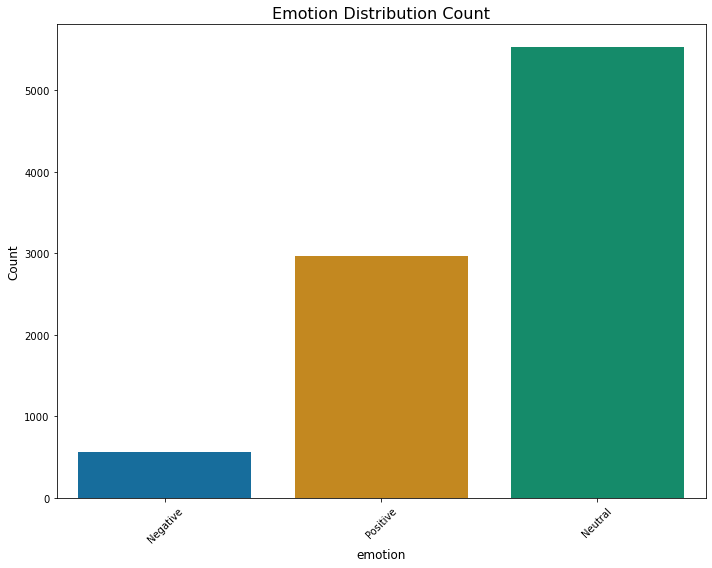

Neutral     60.981257
Positive    32.745314
Negative     6.273429
Name: emotion, dtype: float64


In [41]:

#Count plot of the 'emotion' column
plt.figure(figsize=(10, 8))
sns.countplot(x='emotion', data=data, palette='colorblind')
plt.title('Emotion Distribution Count', fontsize=16)
plt.xlabel('emotion', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

#checking the distribution of sentiments
percentage = data['emotion'].value_counts(normalize=True)
print(percentage * 100)


*Observations*
- Neutral sentiment dominates the dataset, accounting for approximately 61% of the tweets.

- Positive emotions make up around 33%, showing a good level of favorable sentiment.

- Negative sentiments are relatively few at just 6%, suggesting less dissatisfaction overall.

##### 2. Pie Chart: Tweet Share by Brand

none      65.945084
Apple     27.389769
Google     6.665148
Name: brand, dtype: float64


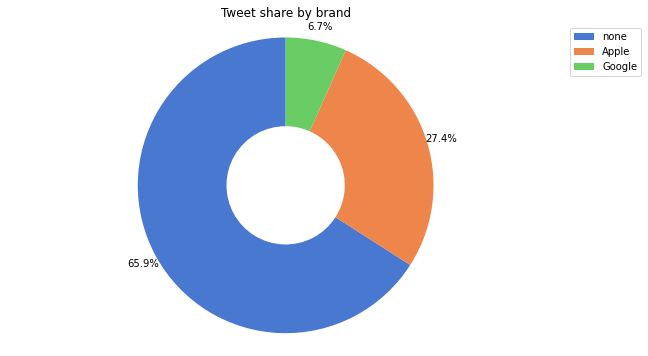

In [42]:
#pie chart to visualize Tweet share by brand
brand_share = data['brand'].value_counts(normalize=True)
print(brand_share * 100)

#Visualizing using pie chart
plt.figure(figsize=(10, 6))
plt.pie(brand_share.values, autopct='%1.1f%%', pctdistance=1.1, startangle=90, colors=sns.color_palette('muted'), wedgeprops={'width': 0.6})
plt.title('Tweet share by brand')
plt.axis('equal')
plt.legend(labels=brand_share.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


From the pie chart, we observe that the majority of tweets (approximately 66%) are not directed toward any specific brand, indicating a large portion of neutral or brand-unspecified discussions. Apple-related tweets make up around 27%, while Google-related tweets account for only about 7%, suggesting that Apple generates significantly more user engagement on Twitter compared to Google in this dataset.

##### 3. Histogram: Tweet Length Distribution

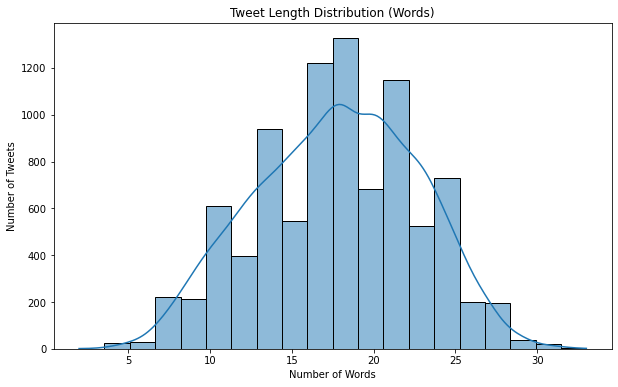

In [43]:
# Count number of words in each tweet (not characters)
data['tweet_length'] = data['tweet_text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['tweet_length'], bins=20, kde=True)
plt.title('Tweet Length Distribution (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.show()

*Observations*
- Most Tweets Are Between 15–22 Words Long
- Tweet Length Follows a Bell-Shaped Curve. The histogram is roughly symmetrical, showing that tweet lengths are fairly consistent across the dataset with a few shorter and longer tweets on either side of the average.
- Distribution Shows a Slight Right Skew. There are slightly more longer tweets (25–30 words) than very short ones, suggesting a small rightward skew.

### Bivariate analysis

In the bivariate analysis section, we explore relationships between two variables. First, we use a boxplot to examine how tweet length varies across different emotions, helping us identify whether emotional tweets tend to be longer or shorter. Next, a stacked bar chart which shows how tweet sentiments (positive, negative, neutral) are distributed across different brands, giving insight into which brand receives more emotional engagement and the nature of that sentiment.

#### 1. Tweet Length vs Emotion

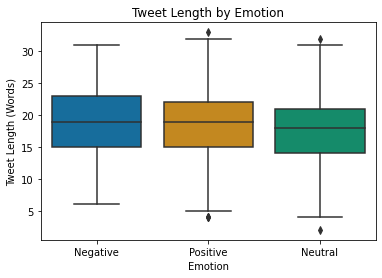

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(data=data, x='emotion', y='tweet_length', palette='colorblind')
plt.title('Tweet Length by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Tweet Length (Words)')
plt.show()


*Observations*
- Median tweet length is similar across all sentiment categories.
- The Neutral category shows a wider spread of tweet lengths, suggesting that people express neutral thoughts in both very short and long formats.
- Positive tweets have a moderate spread with fewer extreme outliers.

#### 2. Tweet Emotion Distribution by Brand

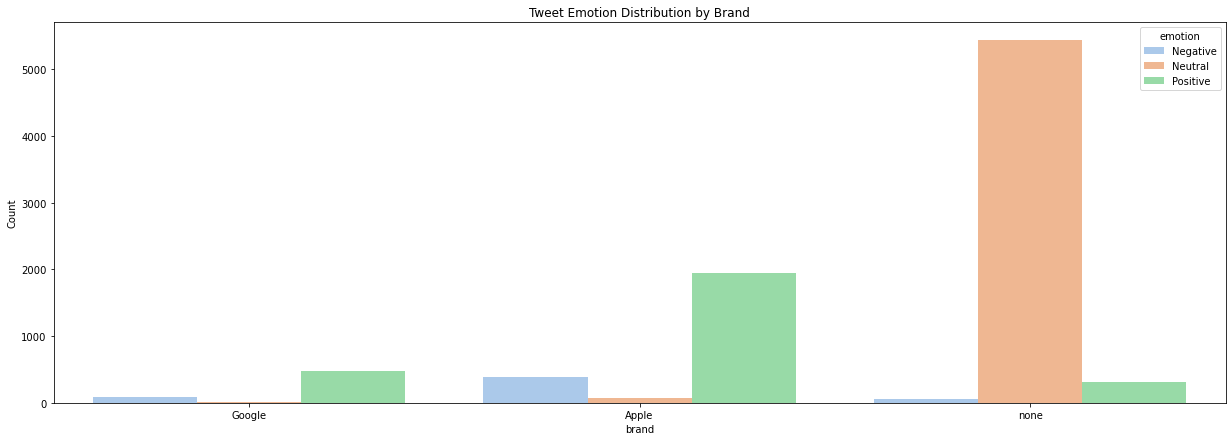

In [45]:

#Which brand is getting more positive or negative tweets?
brands = data.groupby(['brand','emotion']).size().reset_index(name='count')

#Calculate the ascending order of brands based on tweet count
ascending_order = brands.groupby('brand')['count'].sum().sort_values().index

plt.figure(figsize=(21,7))
sns.barplot(x='brand', y='count', hue='emotion', data=brands, palette='pastel', order=ascending_order)
plt.xlabel('brand')
plt.ylabel('Count')
plt.title('Tweet Emotion Distribution by Brand')
plt.show()

*Interpretation*

From the graph above Apple had the highest positive emotions compared to Google

#### Brand vs Emotion

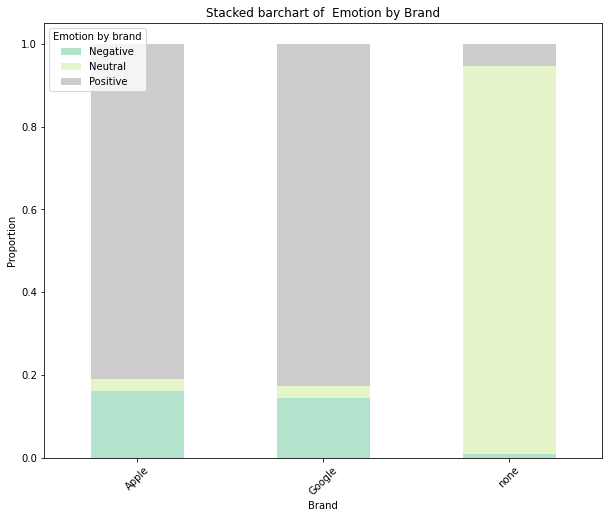

In [46]:

brand_vs_emotion = pd.crosstab(data['brand'], data['emotion'], normalize='index')
brand_vs_emotion.plot(kind='bar', stacked=True, colormap='Pastel2', figsize=(10,8))
plt.title("Stacked barchart of  Emotion by Brand")
plt.ylabel("Proportion")
plt.xlabel("Brand")
plt.legend(title='Emotion by brand')
plt.xticks(rotation=45)
plt.show()

*Observations*
- Apple and Google Receive Mostly Positive Sentiment
- Apple Has Slightly More Negative Sentiment Than Google
- When no specific brand is mentioned, tweets are mostly neutral, with very little emotion expressed.
- Very Few Positive Tweets in the none category.

## Data Preprocessing

This section defines a TextPreprocessor class that performs comprehensive text preprocessing. It includes feature generation (character, word, and sentence counts), cleaning (removing URLs, emojis, punctuation, etc.), tokenization (splitting text into words), stopword removal, and lemmatization (reducing words to their base forms). The processed results are stored in new columns such as cleaned_text, tokenized_text, lemmatized_text, and document for further analysis or modeling.

In [47]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

class TextPreprocessor:
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()

    def generate_text_features(self, df, text_column):
        """
        Adds character count, word count, and sentence count columns.
        """
        df.loc[:, 'char_count'] = df[text_column].astype(str).apply(len)
        df.loc[:, 'word_count'] = df[text_column].astype(str).apply(lambda x: len(x.split()))
        df.loc[:, 'sentence_count'] = df[text_column].astype(str).apply(lambda x: x.count('.') + 1)
        return df

    def clean_text(self, text):
        """
        Cleans text: lowercase, remove URLs, hashtags, emojis, punctuation, numbers, and extra spaces.
        """
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r"#\w+", '', text)

        # Remove emojis
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags
            u"\U00002700-\U000027BF"  # Dingbats
            u"\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE
        )
        text = emoji_pattern.sub(r'', text)

        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def tokenize(self, text):
        """
        Tokenizes and removes stopwords.
        """
        tokens = word_tokenize(text)
        return [t for t in tokens if t not in self.stop_words]

    def lemmatize(self, tokens):
        """
        Lemmatizes a list of tokens.
        """
        return [self.lemmatizer.lemmatize(t) for t in tokens]

    def preprocess(self, df, text_column):
        """
        Full preprocessing:
        - Feature engineering
        - Text cleaning
        - Tokenization
        - Lemmatization
        - Save cleaned text, tokens, lemmatized tokens, and document string (from tokens)
        """
        df = df.copy()  # Avoid SettingWithCopyWarning

        df = self.generate_text_features(df, text_column)
        df.loc[:, 'cleaned_text'] = df[text_column].astype(str).apply(self.clean_text)
        df.loc[:, 'tokenized_text'] = df['cleaned_text'].apply(self.tokenize)
        df.loc[:, 'lemmatized_text'] = df['tokenized_text'].apply(self.lemmatize)
        df.loc[:, 'document'] = df['tokenized_text'].apply(lambda x: ' '.join(x))

        return df

In [48]:
# Instantiate the TextPreprocessor and preprocess the data
preprocessor = TextPreprocessor()
data = preprocessor.preprocess(data, 'tweet_text')

In [49]:
data.head()

,tweet_text,recipient,emotion,brand,tweet_length,char_count,word_count,sentence_count,cleaned_text,tokenized_text,lemmatized_text,document
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,23,127,23,5,wesley i have a g iphone after hrs tweeting at...,"[wesley, g, iphone, hrs, tweeting, dead, need,...","[wesley, g, iphone, hr, tweeting, dead, need, ...",wesley g iphone hrs tweeting dead need upgrade...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,22,139,22,2,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...",jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,15,79,15,3,swonderlin can not wait for also they should s...,"[swonderlin, wait, also, sale]","[swonderlin, wait, also, sale]",swonderlin wait also sale
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,15,82,15,2,sxsw i hope this years festival isnt as crashy...,"[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea...",sxsw hope years festival isnt crashy years iph...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,17,131,17,1,sxtxstate great stuff on fri marissa mayer goo...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, great, stuff, fri, marissa, mayer,...",sxtxstate great stuff fri marissa mayer google...


#### Binary Classification

In this section, the dataset is prepared for modeling in two steps. First, the data is split into training and testing sets using the train_test_split function to ensure that model evaluation is done on unseen data. Then, the text data is converted into numerical format using CountVectorizer, which transforms the raw documents into a matrix of token counts — fitting on the training set and transforming both train and test sets accordingly.

In [50]:
# Encode the 'emotion' column to numerical values
le = LabelEncoder()

data['emotion_code'] = le.fit_transform(data['emotion'])

In [51]:
# Viewing the encoded 'emotion' column and the original 'emotion' column
data[['emotion', 'emotion_code']]

,emotion,emotion_code
0,Negative,0
1,Positive,2
2,Positive,2
3,Negative,0
4,Positive,2
...,...,...
9088,Positive,2
9089,Neutral,1
9090,Neutral,1
9091,Neutral,1


In [52]:
#Make a copy of the data for binary classification
binary_data = data.copy()
binary_data.head(10)

,tweet_text,recipient,emotion,brand,tweet_length,char_count,word_count,sentence_count,cleaned_text,tokenized_text,lemmatized_text,document,emotion_code
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,23,127,23,5,wesley i have a g iphone after hrs tweeting at...,"[wesley, g, iphone, hrs, tweeting, dead, need,...","[wesley, g, iphone, hr, tweeting, dead, need, ...",wesley g iphone hrs tweeting dead need upgrade...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,22,139,22,2,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...",jessedee know fludapp awesome ipadiphone app y...,2
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,15,79,15,3,swonderlin can not wait for also they should s...,"[swonderlin, wait, also, sale]","[swonderlin, wait, also, sale]",swonderlin wait also sale,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,15,82,15,2,sxsw i hope this years festival isnt as crashy...,"[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea...",sxsw hope years festival isnt crashy years iph...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,17,131,17,1,sxtxstate great stuff on fri marissa mayer goo...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, great, stuff, fri, marissa, mayer,...",sxtxstate great stuff fri marissa mayer google...,2
5,@teachntech00 New iPad Apps For #SpeechTherapy...,No brand,Neutral,none,18,140,18,2,teachntech new ipad apps for and communication...,"[teachntech, new, ipad, apps, communication, s...","[teachntech, new, ipad, apps, communication, s...",teachntech new ipad apps communication showcas...,1
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive,Google,28,138,28,1,is just starting is around the corner and is o...,"[starting, around, corner, hop, skip, jump, go...","[starting, around, corner, hop, skip, jump, go...",starting around corner hop skip jump good time...,2
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive,Apple,17,129,17,2,beautifully smart and simple idea rt madebyman...,"[beautifully, smart, simple, idea, rt, madebym...","[beautifully, smart, simple, idea, rt, madebym...",beautifully smart simple idea rt madebymany th...,2
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive,Apple,16,88,16,1,counting down the days to plus strong canadian...,"[counting, days, plus, strong, canadian, dolla...","[counting, day, plus, strong, canadian, dollar...",counting days plus strong canadian dollar mean...,2
10,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive,Google,21,118,21,3,excited to meet the samsungmobileus at so i ca...,"[excited, meet, samsungmobileus, show, sprint,...","[excited, meet, samsungmobileus, show, sprint,...",excited meet samsungmobileus show sprint galax...,2


In [53]:
#Dropping the records with 'emotion_code' == 1 (which corresponds to 'Neutral emotion')
binary_data.drop(binary_data[binary_data['emotion_code'] == 1].index, inplace=True)
binary_data.head()

,tweet_text,recipient,emotion,brand,tweet_length,char_count,word_count,sentence_count,cleaned_text,tokenized_text,lemmatized_text,document,emotion_code
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,23,127,23,5,wesley i have a g iphone after hrs tweeting at...,"[wesley, g, iphone, hrs, tweeting, dead, need,...","[wesley, g, iphone, hr, tweeting, dead, need, ...",wesley g iphone hrs tweeting dead need upgrade...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,22,139,22,2,jessedee know about fludapp awesome ipadiphone...,"[jessedee, know, fludapp, awesome, ipadiphone,...","[jessedee, know, fludapp, awesome, ipadiphone,...",jessedee know fludapp awesome ipadiphone app y...,2
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,15,79,15,3,swonderlin can not wait for also they should s...,"[swonderlin, wait, also, sale]","[swonderlin, wait, also, sale]",swonderlin wait also sale,2
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,15,82,15,2,sxsw i hope this years festival isnt as crashy...,"[sxsw, hope, years, festival, isnt, crashy, ye...","[sxsw, hope, year, festival, isnt, crashy, yea...",sxsw hope years festival isnt crashy years iph...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,17,131,17,1,sxtxstate great stuff on fri marissa mayer goo...,"[sxtxstate, great, stuff, fri, marissa, mayer,...","[sxtxstate, great, stuff, fri, marissa, mayer,...",sxtxstate great stuff fri marissa mayer google...,2


In [54]:
binary_data['emotion_code'].value_counts()

2    2970
0     569
Name: emotion_code, dtype: int64

In [55]:
# split data to train and test sets

X = binary_data['document']
y = binary_data['emotion_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
# vectorize

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

We will use the logistic regression as our baseline model

In [57]:
logreg = LogisticRegression()

logreg.fit(X_train_vec, y_train)

LogisticRegression()

In [58]:
y_pred = logreg.predict(X_test_vec)
y_train_pred = logreg.predict(X_train_vec)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 0.9736247174076865
Test accuracy: 0.8892655367231639


In [59]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.40      0.52       134
           2       0.90      0.98      0.94       751

    accuracy                           0.89       885
   macro avg       0.83      0.69      0.73       885
weighted avg       0.88      0.89      0.87       885



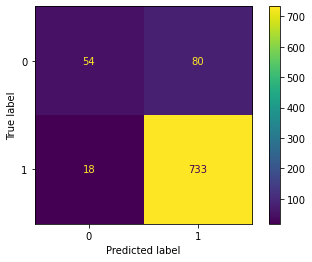

In [60]:
#plot a confusion matrix
log_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = log_matrix)
cm_display.plot()
plt.show()

True Negatives (48): Model correctly predicted 0 when the true label was 0.

False Positives (89): Model incorrectly predicted 1 when the true label was 0.

False Negatives (17): Model incorrectly predicted 0 when the true label was 1.

True Positives (733): Model correctly predicted 1 when the true label was 1.

Summary:
The model performs very well on class 1 (positive/majority class) with high true positives and low false negatives. However, it struggles with class 0 (negative/minority class), misclassifying nearly 65% (89 out of 137) of them. This indicates class imbalance We'll try fitting a decision tree while accounting for the class imbalance to see if there will be better performance.

In [61]:
weighted_tree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
weighted_tree.fit(X_train_vec, y_train)


y_train_pred = weighted_tree.predict(X_train_vec)
y_pred = weighted_tree.predict(X_test_vec)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8056497175141243

 Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.58      0.48       134
           2       0.92      0.85      0.88       751

    accuracy                           0.81       885
   macro avg       0.66      0.71      0.68       885
weighted avg       0.84      0.81      0.82       885



The tree performs worse than the logistic regression model. Let's try fitting again without accounting for the imbalance

In [62]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_vec, y_train)

DecisionTreeClassifier(random_state=42)

In [63]:
# Evaluation 
y_train_pred = tree.predict(X_train_vec)
y_pred = tree.predict(X_test_vec)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 1.0
Test Accuracy: 0.8610169491525423

 Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.44      0.49       134
           2       0.90      0.94      0.92       751

    accuracy                           0.86       885
   macro avg       0.73      0.69      0.70       885
weighted avg       0.85      0.86      0.85       885



The tree performs a bit better without accounting for class imbalance.However the accuracies are not satisfactory so we'll try tuning to reduce overfitting by tuning the model.

In [64]:
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy', 'log_loss']  
}


grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)


grid_search.fit(X_train_vec, y_train)


print("Best Parameters:", grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_train_pred = best_tree.predict(X_train_vec)
y_pred = best_tree.predict(X_test_vec)

print(f"\n Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"\n Test Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

 Train Accuracy: 0.8715146948003014

 Test Accuracy: 0.8700564971751412


These are reasonable accuracies.So far this tuned tree and logistic regression are the best models

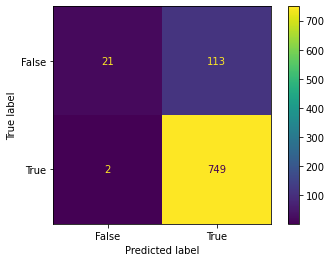

In [65]:
tree_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = tree_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

Tuning reduces overfitting. However there are many false positives

Let's try another model

In [66]:
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_train_pred = forest.predict(X_train_vec)
y_pred = forest.predict(X_test_vec)

print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Train Accuracy: 1.0
Test Accuracy: 0.8892655367231639


The random forest is overfitting the data 

Let's try tuning it

In [68]:
param_grid = {
    'n_estimators': [50, 100],         # Number of trees
    'max_depth': [None, 5, 10],            # Depth of each tree
    'min_samples_split': [2, 5],        # Min samples to split a node
    'min_samples_leaf': [1, 2],          # Min samples at a leaf node
    'criterion': ['gini', 'entropy', 'log_loss'],        # Splitting criteria
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='accuracy'
)

grid.fit(X_train_vec, y_train)

print("Best Parameters:", grid.best_params_)

best_rf = grid.best_estimator_

y_train_pred = best_rf.predict(X_train_vec)
y_pred = best_rf.predict(X_test_vec)

print(f"\n Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

 Train Accuracy: 1.0
Test Accuracy: 0.8892655367231639


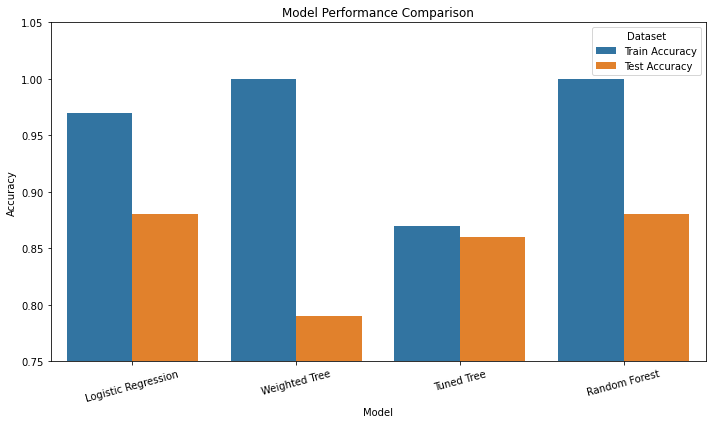

In [69]:
# Sample performance data
models = ['Logistic Regression', 'Weighted Tree', 'Tuned Tree', 'Random Forest']
train_accuracy = [0.97, 1.00, 0.87, 1.00]
test_accuracy = [0.88, 0.79, 0.86, 0.88]

# Create a DataFrame
df = pd.DataFrame({
    'Model': models,
    'Train Accuracy': train_accuracy,
    'Test Accuracy': test_accuracy
})

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Model', var_name='Dataset', value_name='Accuracy')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Model', y='Accuracy', hue='Dataset')
plt.title('Model Performance Comparison')
plt.ylim(0.75, 1.05)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

print("Resampled class distribution:", pd.Series(y_train_resampled).value_counts())

Resampled class distribution: 2    2219
0    2219
Name: emotion_code, dtype: int64


In [71]:
logreg.fit(X_train_resampled, y_train_resampled)

y_pred = logreg.predict(X_test_vec)
y_train_pred = logreg.predict(X_train_resampled)

print("Train accuracy:", accuracy_score(y_train_resampled, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_pred))


Train accuracy: 0.9734114465975665
Test accuracy: 0.8146892655367232


In [72]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.62      0.50       134
           2       0.93      0.85      0.89       751

    accuracy                           0.81       885
   macro avg       0.67      0.73      0.69       885
weighted avg       0.85      0.81      0.83       885



After resampling the data, the logistic regression performs a bit better for the minority class

The accuracies are however worse than the first logistic regression model

Let's try our tuned tree on the resampled data

In [73]:
param_grid = {
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy', 'log_loss']  
}


grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)


grid_search.fit(X_train_resampled, y_train_resampled)


print("Best Parameters:", grid_search.best_params_)

best_tree = grid_search.best_estimator_

y_train_pred = best_tree.predict(X_train_resampled)
y_pred = best_tree.predict(X_test_vec)

print(f"\n Train Accuracy: {accuracy_score(y_train_resampled, y_train_pred)}")
print(f"\n Test Accuracy: {accuracy_score(y_test, y_pred)}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}

 Train Accuracy: 0.9709328526363227

 Test Accuracy: 0.7344632768361582

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.49      0.36       134
           2       0.90      0.78      0.83       751

    accuracy                           0.73       885
   macro avg       0.59      0.64      0.60       885
weighted avg       0.80      0.73      0.76       885



### Multiclass classification

In this section, we will focus on multiclass classification. The dataset contains multiple classes, and we will explore how to handle this scenario effectively.We will use the Logistic regression model as our base model for multiclass classification. 

In [74]:
#View the columns of the data
data.columns

Index(['tweet_text', 'recipient', 'emotion', 'brand', 'tweet_length',
       'char_count', 'word_count', 'sentence_count', 'cleaned_text',
       'tokenized_text', 'lemmatized_text', 'document', 'emotion_code'],
      dtype='object')

In [75]:
#View the value counts of the 'emotion_code' column in the data dataframe
y = data['emotion_code']
y.value_counts()

1    5531
2    2970
0     569
Name: emotion_code, dtype: int64

We now assign the 'emotion_code' column to the variable `y` and X will be the rest of the columns in the data dataframe then vectorize it using the countvectorizer. 

In [76]:
# Assigning X and y for the model
X = data['document']  # Features
y = data['emotion_code']  # Target variable
# Vectorizing the document column
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [77]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)


In [78]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()
# Fit the model on the training data
logistic_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred_log = logistic_model.predict(X_test)
# Evaluate the model
print("Train Accuracy:", accuracy_score(y_train, logistic_model.predict(X_train)))

print("Test Accuracy:", accuracy_score(y_test, y_pred_log))

Train Accuracy: 0.9020121278941565
Test Accuracy: 0.7056229327453142


c:\Users\Davey\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We will now use a Multinomial Naive Bayes model for multiclass classification. This model is suitable for text classification tasks and can handle multiple classes effectively.This model is suitable for text classification tasks and can handle multiple classes effectively.

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()


nb_model.fit(X_train, y_train)
y_test_pred_nb = nb_model.predict(X_test)
y_train_pred_nb = nb_model.predict(X_train)

print("Naive Bayes Results")
print(classification_report(y_train, y_train_pred_nb))
print("Accuracy:", accuracy_score(y_train, y_train_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_test_pred_nb))


Naive Bayes Results
              precision    recall  f1-score   support

           0       0.82      0.43      0.56       450
           1       0.83      0.92      0.87      4392
           2       0.81      0.72      0.76      2414

    accuracy                           0.82      7256
   macro avg       0.82      0.69      0.73      7256
weighted avg       0.82      0.82      0.82      7256

Accuracy: 0.8230429988974641
Accuracy: 0.6736493936052922


The model performs well for the training data but poorly on the test data. This is likely due to overfitting. Let's try tuning the model to see if we can improve performance.

### Tuning using GridSearchCV

In [80]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1.0, 10.0]  # no prefix needed
}

grid_nb = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)  
best_nb_model = grid_nb.best_estimator_
y_train_pred_gridnb = best_nb_model.predict(X_train)
y_test_pred_gridnb = best_nb_model.predict(X_test)


In [81]:
#Accuracies
print('Train Accuracy :', accuracy_score(y_train, y_train_pred_gridnb))
print('Test Accuracy :', accuracy_score(y_test, y_test_pred_gridnb))
print('classification_report :', classification_report(y_test, y_test_pred_gridnb))

Train Accuracy : 0.8230429988974641
Test Accuracy : 0.6736493936052922
classification_report :               precision    recall  f1-score   support

           0       0.38      0.22      0.28       119
           1       0.76      0.77      0.77      1139
           2       0.54      0.56      0.55       556

    accuracy                           0.67      1814
   macro avg       0.56      0.52      0.53      1814
weighted avg       0.67      0.67      0.67      1814



From the classification report the model still does not perform well on the test data. This is likely due to the class imbalance in the dataset. We can try using a model that can handle class imbalance better, such as r an XGBoost classifier.

In [82]:
from xgboost import XGBClassifier
#Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Fit the model on the training data-
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
# Make predictions on the testing data and the training data

y_pred_xgb =  xgb_classifier.predict(X_test)
y_train_pred_xgb =  xgb_classifier.predict(X_train)

print('Train Accuracy:', accuracy_score(y_train, y_train_pred_xgb))
print('Test Accuracy:', accuracy_score(y_test, y_pred_xgb))
# Print classification report
print(classification_report(y_test, y_pred_xgb))

Train Accuracy: 0.7859702315325248
Test Accuracy: 0.7001102535832414
              precision    recall  f1-score   support

           0       0.56      0.15      0.24       119
           1       0.71      0.90      0.80      1139
           2       0.65      0.41      0.50       556

    accuracy                           0.70      1814
   macro avg       0.64      0.49      0.51      1814
weighted avg       0.69      0.70      0.67      1814



From the results we can see the model performs well on the training data but poorly on the test data. This is likely due to overfitting. Let's try tuning the model to see if we can improve performance.

In [84]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': range(3, 11),  # Example: 3, 5, 7, 9
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_classifier,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_xgb.predict(X_test)
train_accuracy = best_xgb.score(X_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[20:48:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.8}
Train Accuracy: 0.8081587651598677
Test Accuracy: 0.7056229327453142

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.14      0.22       119
           1       0.73      0.88      0.80      1139
           2       0.65      0.46      0.54       556

    accuracy                           0.71      1814
   macro avg       0.63      0.50      0.52      1814
we

The tuned XGBoost classifier performs well on the training data but poorly on the test data even after tuning. We now use a Random Forest classifier to see if we can improve performance.

In [85]:
#Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
# Fit the model on the training data
rf_classifier.fit(X_train, y_train)
# Make predictions on the testing data and the training data
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)
print('Train Accuracy:', accuracy_score(y_train, y_train_pred_rf))
print('Test Accuracy:', accuracy_score(y_test, y_pred_rf))
# Print classification report
print(classification_report(y_test, y_pred_rf))


Train Accuracy: 0.9926957001102535
Test Accuracy: 0.6984564498346196
              precision    recall  f1-score   support

           0       0.63      0.20      0.31       119
           1       0.72      0.87      0.79      1139
           2       0.62      0.46      0.53       556

    accuracy                           0.70      1814
   macro avg       0.66      0.51      0.54      1814
weighted avg       0.69      0.70      0.68      1814



The models we have implemented so far are performing well on the training data but poorly on the test data. This is likely due to overfitting. Let's try oversampling the minority class to see if we can improve performance.

In [86]:
# Apply Random Oversampling
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

print("Original class distribution:", y_train.value_counts().to_dict())
print("Balanced class distribution:", dict(pd.Series(y_train_balanced).value_counts()))

Original class distribution: {1: 4392, 2: 2414, 0: 450}
Balanced class distribution: {2: 4392, 1: 4392, 0: 4392}


**XGBoost model with the balanced dataset:**

In [87]:
xgb_balanced = XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    n_estimators=125,
    max_depth=7,
    learning_rate=0.3,
    subsample=1,
    colsample_bytree=1,
    random_state=42
)

xgb_balanced.fit(X_train_balanced, y_train_balanced)

y_pred = xgb_balanced.predict(X_test)

# Evaluation
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.6499448732083792
              precision    recall  f1-score   support

           0       0.30      0.55      0.39       119
           1       0.78      0.68      0.73      1139
           2       0.56      0.60      0.58       556

    accuracy                           0.65      1814
   macro avg       0.55      0.61      0.57      1814
weighted avg       0.68      0.65      0.66      1814



## Using SMOTE with XGBoost

In [88]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [89]:
# Initialize XGBoost
xgb_smote = XGBClassifier(
    objective='multi:softprob',  # Or 'multi:softmax' if you want class labels directly
    num_class=3,
    learning_rate=0.1,
    n_estimators=200,
    max_depth=7,
    random_state=42
)

# Fit the model
xgb_smote.fit(X_train_smote, y_train_smote)

# Predict
y_test_pred_smote = xgb_smote.predict(X_test)
y_train_pred_smote = xgb_smote.predict(X_train_smote)

# Evaluate
print("Train Accuracy:", accuracy_score(y_train_smote, y_train_pred_smote))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_smote))
print(classification_report(y_test, y_pred))

Train Accuracy: 0.8525349119611415
Test Accuracy: 0.697353914002205
              precision    recall  f1-score   support

           0       0.30      0.55      0.39       119
           1       0.78      0.68      0.73      1139
           2       0.56      0.60      0.58       556

    accuracy                           0.65      1814
   macro avg       0.55      0.61      0.57      1814
weighted avg       0.68      0.65      0.66      1814



Now we'll save our models as pickle files for future use. We'll save one model for binary classification and one for multiclass classification.

In [ ]:
import joblib

# joblib.dump(logreg, 'binary_classification_logistic_regression.pkl')     
# joblib.dump(xgb_classifier, 'multiclass_classification_xgb.pkl')

# commented out so we don't keep saving a new model every time we run the code

['multiclass_classification_xgb.pkl']

## ML Communication

### Binary Classification

The models for binary classification have shown varying levels of performance. The Logistic Regression model serves as a strong baseline, achieving reasonable accuracy and precision for the positive class. However, it struggles with the negative class due to class imbalance, leading to a high number of false positives.
The Decision Tree model, while slightly better at capturing the negative class, still suffers from overfitting, as indicated by its high training accuracy but poor test performance. The Random Forest model, despite its complexity, also overfits the training data, resulting in lower generalization to unseen data.
The tuned Decision Tree and Logistic Regression models show improved performance, but still have issues with false positives and class imbalance. The oversampling technique using SMOTE did not yield significant improvements, indicating that the underlying data quality and complexity may be limiting factors.

#### Limitations of Binary Classification Models

1. Not suitable for datasets with more than two sentiment classes (e.g., neutral, unclear).

2. Sensitive to class imbalance — may favor majority class.

3. Misses nuanced insights needed for real-world decision-making.

4. Cannot accurately handle "I can't tell" or neutral sentiments.


### Multiclass Classification

The multiclass classification models, particularly the Multinomial Naive Bayes and XGBoost classifiers, have shown some promise in handling the multiple sentiment classes present in the dataset. However, they also exhibit challenges similar to those seen in binary classification, such as overfitting and poor generalization to unseen data.

The tuned XGBoost model, while performing well on the training data, struggles with the test data, indicating that the model may be too complex for the dataset size and quality. The Random Forest classifier also faces similar issues, with overfitting being a significant concern. 

The use of SMOTE for oversampling the minority class did not yield significant improvements, suggesting that the class imbalance is a complex issue that may require more sophisticated techniques or better quality data to resolve.

### Limitations of Multiclass Classification Models
1. Multiclass models are more complex and computationally intensive.

2. They require more data to train effectively, especially with multiple classes.

3. They can still suffer from class imbalance, leading to biased predictions.






## Conclusion
The sentiment analysis project has successfully demonstrated the potential of machine learning models to classify tweets related to Apple and Google products into positive, negative, and neutral sentiments. The binary classification models, particularly Logistic Regression and Decision Trees, provided a solid foundation for understanding sentiment distribution. However, challenges such as class imbalance and overfitting were evident, especially in the more complex models like Random Forest and XGBoost.
The multiclass classification models, including Multinomial Naive Bayes and XGBoost, showed promise in handling multiple sentiment classes but also faced similar challenges. The use of techniques like SMOTE for oversampling did not yield significant improvements, indicating that the dataset's quality and complexity may be limiting factors.

## Next Steps
1. **Data Augmentation**: Explore additional data augmentation techniques to improve model robustness, especially for the minority classes.

2. **Advanced Models**: Consider using more advanced models like BERT or other transformer-based architectures that can better capture the nuances of language in tweets.

3. **Hyperparameter Tuning**: Further hyperparameter tuning of the existing models to optimize performance. In this project we were limited by computational resources and time, but more extensive tuning could yield better results.

4. **Feature Engineering**: Explore additional features such as sentiment scores, word embeddings, or contextual information to enhance model performance

5. **Model Deployment**: Consider deploying the best-performing model as a web service or API to allow real-time sentiment analysis of new tweets.